### 손글씨 이미지 분류 - RNN

In [1]:
!pip install tensorflow -q

In [2]:
!pip install IPython -q

     |████████████████████████████████| 1.6 MB 5.4 MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
%matplotlib inline

SEED = 41

In [4]:
mnist = keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
print(f"train_images:{train_images.shape}")

train_images:(60000, 28, 28)


### 28*28 이미지를 plt로 출력

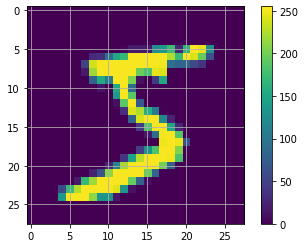

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

### train_images에서 0이 아닌 값 출력

In [12]:
list(filter(lambda x:x != 0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [16]:
print(train_images.dtype, train_labels.dtype)

uint8 uint8


### train/test 이미지 데이터 범위

In [17]:
print(test_images.shape, test_images.shape)

(10000, 28, 28) (10000, 28, 28)


In [18]:
list(filter(lambda x:x != 0, test_images[0].reshape(-1)))[:10]

[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]

### train/test 이미지 데이터 최소/최대값 출력

In [19]:
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)))

255 0


### 정수형을 실수형으로 변환

In [20]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [22]:
train_images = train_images/255
test_images = test_images/255

In [24]:
list(filter(lambda x:x != 0, train_images[0].reshape(-1)))[:10]

[0.011764705882352941,
 0.07058823529411765,
 0.07058823529411765,
 0.07058823529411765,
 0.49411764705882355,
 0.5333333333333333,
 0.6862745098039216,
 0.10196078431372549,
 0.6509803921568628,
 1.0]

In [25]:
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)))

1.0 0.0


### 시각화 방법

In [26]:
train_images[0:5].shape

(5, 28, 28)

In [28]:
np.hstack(train_images[0:5]).shape 
# np.hstack은 height 바햐의 배열을 풀어서 width 방향으로 연결
# (height, image_height, image_width)의 shape을 (image_weight, image_width*height) 으로 변환

(28, 140)

In [31]:
tf.transpose(train_images[0:5]).shape

TensorShape([28, 28, 5])